<a href="https://colab.research.google.com/github/FGalvao77/Analise-de-sentimentos-do-trailer-do-filme-THE-BATMAN/blob/main/An%C3%A1lise_de_sentimentos_do_trailer_do_filme_THE_BATMAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **An√°lise de "sentimentos" do trailer do filme THE BATMAN**

---



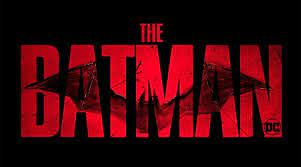

Nessa atividade, iremos realizar uma **an√°lise de sentimentos** do trailer do filme [**`The Batman`**](https://www.youtube.com/watch?v=rsQEor4y2hg) estrelado por **Robert Pattinson**, o v√≠deo se encontra no [`YouTube`](https://www.youtube.com/) do canal oficial da **Warner Bros. Pictures Brasil**.

Atividade consite em analisar os "sentimentos" do p√∫blico quanto a expectativa do filme diante da visualiza√ß√£o do trailer. Para isso, usaremos t√©cnicas de `"Web Scraping"` e `"NLP"`, com aux√≠lio das bibliotecas `Selenium`, `NLTK` e entre outras.
- toda an√°lise ser√° executada no ambiente do `google colab` que demandar√° configuar o ambiente para aplica√ß√£o da an√°lise.

Veja o trailer abaixo.

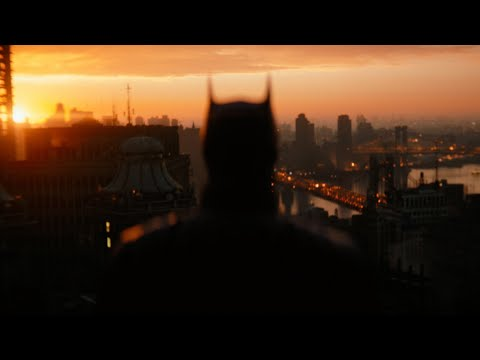

In [1]:
# importando a biblioteca para exibi√ß√£o do v√≠deo no ambiente do google colab
from IPython.display import YouTubeVideo

# instanciando o v√≠deo - THE BATMAN
YouTubeVideo("rsQEor4y2hg", width=640)

Antes de tudo, vamos analisar a popularidade de pesquisa dos termos `The Batman` e `Robert Pattinson` no **Google Trends**. Para isso utilizaremos a **API** Pytrends python. 

- O _Google Trends_ √© um site de propriedade do Google que analisa a popularidade dos termos de pesquisa em v√°rias regi√µes e idiomas. 

No site do [Google Trends](https://trends.google.com/trends/?geo=US), voc√™ pode ver palavras-chave de tend√™ncia, avaliar a popularidade de termos de pesquisa espec√≠ficos em diferentes per√≠odos de tempo, explorar palavras-chave relacionadas e muito mais. Eu encorajo voc√™ a verificar o site deles, se voc√™ nunca esteve l√° antes. Cuidado, voc√™ provavelmente entrar√° em uma toca de coelho  ; ).

- O _Pytrends_, de acordo com a p√°gina [Pytrends PyPI](https://pypi.org/project/pytrends/), √© uma `API n√£o oficial do Google Trends` que pode ser usada para extrair informa√ß√µes √∫teis de pesquisa usando uma interface simples. 

Esteja ciente de que, devido ao status n√£o oficial da API, qualquer altera√ß√£o no back-end do Google Trend pode afetar a capacidade do usu√°rio de usar a biblioteca. Certifique-se de que o Pytrends ainda esteja ativo e atualizado.

In [2]:
# instalando a biblioteca
!pip install pytrends

In [3]:
# importando a biblioteca
from pytrends.request import TrendReq

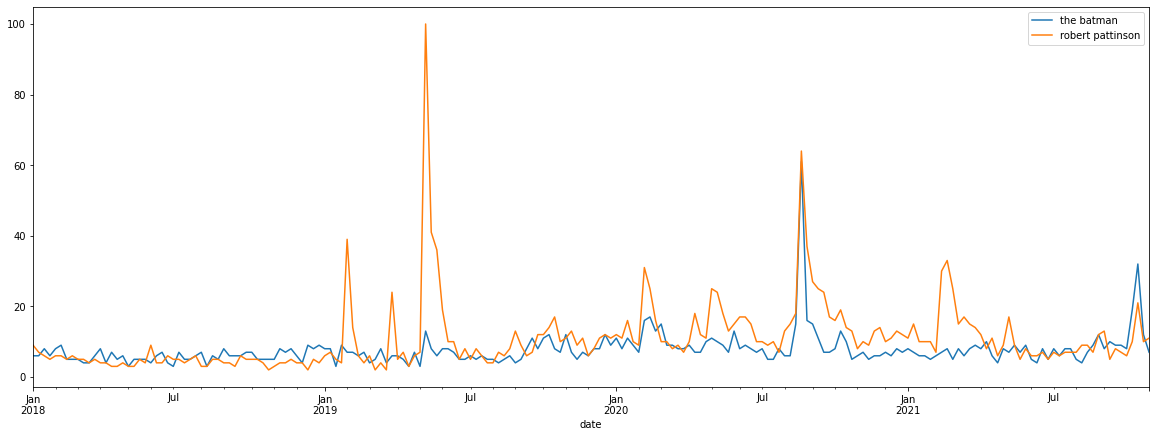

In [6]:
# instanciando o pytrends
pytrends = TrendReq(hl='en-US', tz=360)

# criando uma lista com os termos
kw_list = ['the batman', 'robert pattinson'] 

# definindo a pesquisa com a lista de termos, espa√ßo de tempo e localiza√ß√£o
pytrends.build_payload(kw_list, timeframe='2018-01-01 2021-10-31', geo='BR')

# criando um dataframe com o resultado da pesquisa
df = pytrends.interest_over_time()

# plotando o gr√°fico de s√©rie temporal
df.plot(figsize=(20, 7));

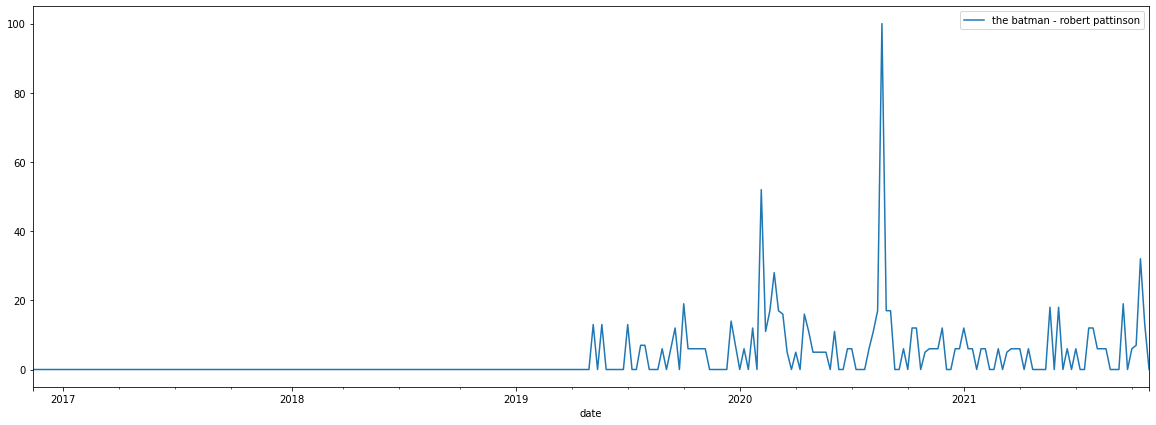

In [7]:
# este c√≥digo tem a mesma funcionalidade que foi realizado acima
# por√©m, aqui usei o termo unido "the batman - robert pattinson" e 
# n√£o defini o espa√ßo de tempo e a localiza√ß√£o da procura
pytrends = TrendReq(hl='en-US', tz=360)
pytrends.build_payload(kw_list=['the batman - robert pattinson'])

df = pytrends.interest_over_time()
df[['the batman - robert pattinson']].plot(figsize=(20, 7));

#### 1. Instalando a biblioteca `selenium` para aplica√ß√£o da an√°lise.

In [8]:
# instalando a biblioteca
!pip install selenium

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 954 kB 6.8 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 356 kB 68.1 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 138 kB 62.1 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 55 kB 3.6 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3.5 MB 49.0 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 54 kB 3.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This be

In [9]:
# atualizando os diret√≥rios
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [73.0 kB]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:13 http://ppa.launchpad.net/cran/

In [10]:
# instalando o "chromedriver" no ambiente do google colab
!apt install chromium-chromedriver

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  chromium-browser chromium-browser-l10n chromium-codecs-ffmpeg-extra
Suggested packages:
  webaccounts-chromium-extension unity-chromium-extension
The following NEW packages will be installed:
  chromium-browser chromium-browser-l10n chromium-chromedriver
  chromium-codecs-ffmpeg-extra
0 upgraded, 4 newly installed, 0 to remove and 55 not upgraded.
Need to get 94.0 MB of archives.
After this operation, 324 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-codecs-ffmpeg-extra amd64 95.0.4638.69-0ubuntu0.18.04.1 [1,135 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-browser amd64 95.0.4638.69-0ubuntu0.18.04.1 [83.6 MB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-browser-l10n all 95.0.4638.69-0ubuntu0.18.0

In [11]:
# removendo apica√ß√µes obsoletas
!apt autoremove

Reading package lists... Done
Building dependency tree       
Reading state information... Done
0 upgraded, 0 newly installed, 0 to remove and 55 not upgraded.


In [12]:
# da biblioteca "selenium" e da fun√ß√£o "webdriver" importando "Chrome"
from selenium import webdriver
# from selenium.webdriver import Chrome, ChromeOptions

In [13]:
# instanciando a fun√ß√£o ".ChromeOptions()" no objeto "chrome_options"
chrome_options = webdriver.ChromeOptions()
# chrome_options = ChromeOptions()

In [14]:
# configurando o ambiente para executar o chrome driver no ambineto do google colab
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [16]:
# instanciando o "webdriver.Chrome()", como argumento passando a configura√ß√£o do ambiente
wd_chrome = webdriver.Chrome(chrome_options=chrome_options)
# wd_chrome = Chrome(chrome_options=chrome_options)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


#### 2. Importando as demais biliotecas para realizar a "raspagem.

In [17]:
# "time" para pegar informa√ß√µes de tempo em tempo  
import time       

# "selenium" para automotizar o processo para conectar ao navegador "Chrome"                                                
# from selenium.webdriver import Chrome                            
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [18]:
# criando uma lista para guardar as informa√ß√µes
data = []

In [19]:
# realizando a "raspagem" do coment√°rios do v√≠deo
with webdriver.Chrome(chrome_options=chrome_options) as driver:

    wait = WebDriverWait(driver, 20)
    driver.get('https://www.youtube.com/watch?v=rsQEor4y2hg')

    for item in range(60):
        wait.until(EC.visibility_of_element_located((By.TAG_NAME, 'body'))).send_keys(Keys.END)
        time.sleep(20)

    for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, '#content'))):
        data.append(comment.text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


In [21]:
# visualizando os 10 primeiros coment√°rios
data[:10]

['SKIP NAVIGATION\nSIGN IN\n0:00 / 2:38\nBATMAN - Trailer Principal\n6,573,929 viewsOct 16, 2021\n116K\n1.3K\nSHARE\nSAVE\nWarner Bros. Pictures Brasil\n1.9M subscribers\nSUBSCRIBE\nN√£o √© s√≥ um chamado... √â um aviso.\n\nA Warner Bros. Pictures apresenta ‚ÄúBatman‚Äù, de Matt Reeves, estrelando Robert Pattinson no papel duplo do vigilante detetive de Gotham City e seu alter ego, o bilion√°rio recluso Bruce Wayne. Ao lado de Pattinson (‚ÄúTenet,‚Äù ‚ÄúO Farol‚Äù) no elenco de personagens famosos e infames de Gotham City, estrelam Zo√´ Kravitz (‚ÄúBig Little Lies‚Äù, ‚ÄúAnimais Fant√°sticos: Os Crimes de Grindelwald‚Äù) como Selina Kyle; Paul Dano (‚ÄúThe Beach Boys: Uma Hist√≥ria de Sucesso‚Äù, ‚Äú12 Anos de Escravid√£o‚Äù) como Edward Nashton; Jeffrey Wright (‚Äú007 - Sem Tempo para Morrer‚Äù, ‚ÄúWestworld‚Äù) como James Gordon do Departamento de Pol√≠cia de Gotham City; John Turturro (filmes ‚ÄúTransformers‚Äù, ‚ÄúThe Plot Against America‚Äù) como Carmine Falcone; Peter Sarsgaard (

In [22]:
# visualizando o tamanho da lista
len(data)

1182

Vamos guardar essas informa√ß√µes em um `dataframe` e, com este, iremos realizar todas as etapas da nossa an√°lise.

In [23]:
# importando a biblioteca
import pandas as pd

In [27]:
# instanciando um dataframe com dados salvos na vari√°vel "data"
df = pd.DataFrame(data, columns=['comment'])

# visualizando as 15 primeiras linhas
df.head(15)

comment
0   SKIP NAVIGATION\nSIGN IN\n0:00 / 2:38\nBATMAN ...
1   N√£o √© s√≥ um chamado... √â um aviso.\n\nA Warner...
2   Por favor, que esse filme seja bom!!! Porque e...
3   Batman violento, psicopata, solit√°rio e sem me...
4   O Batman das hq's parece um vil√£o de filme de ...
5                   Manooo t√° foda demais slk brother
6   A trilha sonora, cen√°rio, fotografia, atores m...
7   Meu Santo Deus!!!!!!!! Que bagulho fodaaaaaaaa...
8   Vejo muito gente reclamando do Robert Pattinso...
9   O engra√ßado √© que muita gente est√° criticando ...
10  Eu n√£o consigo acreditar que, mesmo depois des...
11  Anotem o que digo: ESSE SER√Å O MELHOR BATMAN D...
12  Pra quem tava menosprezando o Pattinson, esse ...
13  Pra quem n√£o  foi fanboy, nem hater, do Nolan,...
14  Perdi as contas de quantas vezes assisti esse ...

In [29]:
# visualizando algumas linhas dos coment√°rios
print(df['comment'][:10])
print(df['comment'][63])
print(df['comment'][168:188])

0    SKIP NAVIGATION\nSIGN IN\n0:00 / 2:38\nBATMAN ...
1    N√£o √© s√≥ um chamado... √â um aviso.\n\nA Warner...
2    Por favor, que esse filme seja bom!!! Porque e...
3    Batman violento, psicopata, solit√°rio e sem me...
4    O Batman das hq's parece um vil√£o de filme de ...
5                    Manooo t√° foda demais slk brother
6    A trilha sonora, cen√°rio, fotografia, atores m...
7    Meu Santo Deus!!!!!!!! Que bagulho fodaaaaaaaa...
8    Vejo muito gente reclamando do Robert Pattinso...
9    O engra√ßado √© que muita gente est√° criticando ...
Name: comment, dtype: object
S√≥ eu reparei o erro na legenda do charada ? ele diz " o que √© preto e azul e esta morto?" colocaram hematoma em corpo kkkkkkk
168    QUE TRAILER MONSTRUOSO! VIVA O V√çDEO MAKER üëèüèæüëè...
169    Ser√£o quantos vil√µes ? Eu contei o 2. Algu√©m s...
170    Espero que Zo√´ Kravitz deia bem para o papel d...
171    Se o Edward mostrasse essa raiva toda que demo...
172    Esse Batman "visceral" est√° bem

In [30]:
# visualizando a dimens√£o do dataframe
df.shape    # linhas e colunas

(1182, 1)

In [31]:
# visualizando o tipo de dado do dataframe
df.dtypes

comment    object
dtype: object

#### 3. Realizando o pr√©-tratamento dos dados.

In [32]:
# importando as bibliotecas necess√°rias
import re, string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

In [33]:
# instalando os pacotes necess√°rios da biblioteca
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package brown_tei to /root/nltk_data...
       |   Unzipping corpora/brown_tei.zip.
       | Downloading package cess_cat to /root/nltk_data...
       |   Unzipping corpora/cess_cat.zip.
       | Downloading package cess_esp to /root/nltk_data...
 

True

In [ ]:
# # realizando o download das "stopwords", "punkt" e "wordnet"
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

In [34]:
# instanciando a vari√°vel "stopwords" e configurando-o em portugu√™s
# sw = stopwords.words('portuguese', 'english')
sw = stopwords.words('portuguese')

In [35]:
# criando uma fun√ß√£o para otimizar a "limpeza" dos dados, 
# realizar a "tokeniza√ß√£o" das palavras e a remo√ß√£o das "stopwords"

def clean_text(text):
    text = text.lower()
    text = re.sub('@', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'[^a-zA-Z ]+', '', text)

    # tokeniza√ß√£o
    text = nltk.word_tokenize(text)

    # removendo os "stopwords"
    text = [w for w in text if w not in sw]
    
    return text

> **Tokeniza√ß√£o**

√â o processo de segmentar o texto em execu√ß√£o em frases e palavras. Em ess√™ncia, √© a tarefa de cortar um texto em peda√ßos chamados `tokens` e, ao mesmo tempo, jogar fora alguns caracteres, como pontua√ß√£o. Seguindo o nosso exemplo, o resultado da _tokeniza√ß√£o _seria:

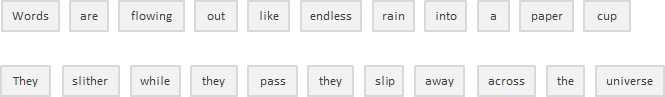

Embora possa parecer b√°sico nesse caso e tamb√©m em idiomas como o ingl√™s que separam as palavras por um espa√ßo em branco (chamados de idiomas segmentados), nem todos os idiomas se comportam da mesma maneira, como a l√≠ngua portuguesa que possui diversas conjuga√ß√µes verbais. Ent√£o apenas os espa√ßos em branco n√£o s√£o suficientes para executar `tokeniza√ß√µes` apropriadas. A divis√£o em espa√ßos em branco pode dividir o que deve ser considerado como um s√≠mbolo, como no caso de certos nomes (por exemplo, San Francisco ou Nova York) ou frases estrangeiras emprestadas (por exemplo, _laissez faire_).

- Fonte: ILUMEO - [Um guia para NPL - Processamento de Linguagem Natural](https://bit.ly/3BvpeMv)

> **Remo√ß√£o de Stop Words**

Inclui a elimina√ß√£o de artigos, pronomes e preposi√ß√µes em idiomas comuns, como "e", "o", ‚Äúa‚Äù em portugu√™s. Nesse processo, algumas palavras muito comuns que parecem fornecer pouco ou nenhum valor ao objetivo da NPL s√£o filtradas e exclu√≠das do texto a ser processado.

Essas **‚Äústop words‚Äù** podem ser ignoradas com seguran√ßa, realizando uma pesquisa em uma lista predefinida de palavras-chave, liberando espa√ßo no banco de dados e melhorando o tempo de processamento.

O problema √© que a remo√ß√£o delas pode apagar informa√ß√µes relevantes e modificar o contexto em uma determinada frase. Por exemplo, se estivermos realizando uma an√°lise de sentimentos, podemos desviar nosso algoritmo se removermos uma _stop word_ como `"n√£o"`. Sob essas condi√ß√µes, √© poss√≠vel selecionar uma lista m√≠nima dessas palavras e adicionar termos, dependendo do objetivo espec√≠fico.

- Fonte: ILUMEO - [Um guia para NPL - Processamento de Linguagem Natural](https://bit.ly/3BvpeMv)

In [36]:
# aplicando a fun√ß√£o no datatframe
df['comment'] = df['comment'].apply(lambda x: clean_text(x))

In [37]:
# visualizando o dataframe
df

comment
0     [skip, navigationsign, trailer, viewsoct, bros...
1     [s, chamado, avisoa, warner, bros, pictures, a...
2     [favor, filme, bom, porque, trailer, deixou, a...
3     [batman, violento, psicopata, solitrio, medo, ...
4     [batman, hqs, parece, vilo, filme, terror, tra...
...                                                 ...
1177  [ahhhh, cad, coringa, nesse, trailer, d, pra, ...
1178                                           [nutela]
1179                                         [vix, sei]
1180    [pra, ter, raiva, olhos, batman, atuao, passou]
1181  [nada, ver, batman, ator, nada, ver, amor, deu...

[1182 rows x 1 columns]

In [38]:
# instanciando a fun√ß√£o para lematiza√ß√£o
lemmatizer = WordNetLemmatizer()

> **Lematiza√ß√£o**

Tem como objetivo reduzir uma palavra √† sua forma base e agrupar diferentes formas da mesma palavra. Por exemplo, os verbos no tempo passado s√£o alterados para presente (por exemplo, ‚Äúfoi‚Äù √© alterado para ‚Äúvai‚Äù) e os sin√¥nimos s√£o unificados (por exemplo, ‚Äúmelhor‚Äù √© alterado para ‚Äúbom‚Äù), padronizando palavras com significado semelhante √† sua raiz. 

_A lematiza√ß√£o resolve as palavras em sua forma de dicion√°rio (conhecida como lema), para a qual requer dicion√°rios detalhados nos quais o algoritmo pode pesquisar e vincular palavras aos lemas correspondentes._

Por exemplo, as palavras ‚Äúcorrer", "corre" e "correu" s√£o todas formas da palavra "correr", portanto "correr" √© o lema de todas as palavras anteriores.

A lematiza√ß√£o tamb√©m leva em considera√ß√£o o contexto da palavra para **resolver outros problemas, como a desambigua√ß√£o**, o que significa que ela pode discriminar entre palavras id√™nticas que t√™m significados diferentes, dependendo do contexto espec√≠fico. Pense em palavras como ‚Äúmorcego‚Äù (que pode corresponder ao animal ou ao clube de ‚Äúbanco‚Äù. Ao fornecer um par√¢metro de parte do discurso para uma palavra (seja um substantivo, um verbo etc.), √© poss√≠vel definir um papel para essa palavra na frase e remover a desambigua√ß√£o.

- Fonte: ILUMEO - [Um guia para NPL - Processamento de Linguagem Natural](https://bit.ly/3BvpeMv)

In [39]:
# criando uma fun√ß√£o para realizar a lematiza√ßa√µ
def lem(text):
    text = [lemmatizer.lemmatize(t) for t in text]
    text = [lemmatizer.lemmatize(t, 'v') for t in text]

    return text

In [40]:
# aplicando a fun√ß√£o no datataframe
df['comment'] = df['comment'].apply(lambda x: lem(x))

In [41]:
# visualizando o dataframe
df

comment
0     [skip, navigationsign, trailer, viewsoct, bros...
1     [s, chamado, avisoa, warner, bros, picture, ap...
2     [favor, filme, bom, porque, trailer, deixou, a...
3     [batman, violento, psicopata, solitrio, medo, ...
4     [batman, hq, parece, vilo, filme, terror, trai...
...                                                 ...
1177  [ahhhh, cad, coringa, nesse, trailer, d, pra, ...
1178                                           [nutela]
1179                                         [vix, sei]
1180    [pra, ter, raiva, olhos, batman, atuao, passou]
1181  [nada, ver, batman, ator, nada, ver, amor, deu...

[1182 rows x 1 columns]

In [42]:
# instanciando uma lista para armazenar as palavras 
all_words = []

# realizando um la√ßo de repeti√ß√£o no dataframe e armazenando as palavras na lista "all_words"
for i in range(len(df)):
    all_words = all_words + df['comment'][i]

In [43]:
# visualizando as 10 primeiras palavras da lista
all_words[:10]

['skip',
 'navigationsign',
 'trailer',
 'viewsoct',
 'bros',
 'picture',
 'subscriberssubscribeno',
 's',
 'chamado',
 'avisoa']

**N-grama**

---
_Origem: Wikip√©dia, a enciclop√©dia livre._

Nos campos de [lingu√≠stica computacional](https://pt.wikipedia.org/wiki/Lingu%C3%ADstica_computacional) e [probabilidade](https://pt.wikipedia.org/wiki/Probabilidade), um n-grama √© uma sequ√™ncia cont√≠gua de n itens de uma determinada [amostra](https://pt.wikipedia.org/wiki/Amostra_(estat%C3%ADstica)) de texto ou fala. Os itens podem ser [fonemas](https://pt.wikipedia.org/wiki/Fonema), [s√≠labas](https://pt.wikipedia.org/wiki/S%C3%ADlaba), [letras](https://pt.wikipedia.org/wiki/Letra), [palavras](https://pt.wikipedia.org/wiki/Palavra) ou [pares de bases](https://pt.wikipedia.org/wiki/Par_de_bases) de acordo com a aplica√ß√£o. Os n -gramas normalmente s√£o coletados de um corpus de [texto](https://pt.wikipedia.org/wiki/Corpus_lingu%C3%ADstico) ou fala.

Usando prefixos num√©ricos latinos, um n -grama de tamanho 1 √© referido como um "unigrama"; o tamanho 2 √© um " bigrama " (ou um "digrama"); o tamanho 3 √© um " trigrama ". Os n√∫meros cardinais s√£o √†s vezes usados, por exemplo, "quatro grama", "cinco grama" e assim por diante. Em biologia computacional, um [pol√≠mero](https://pt.wikipedia.org/wiki/Pol%C3%ADmero) ou [olig√¥mero](https://pt.wikipedia.org/wiki/Olig%C3%B4mero) de tamanho conhecido √© chamado k-mero, em vez de n-grama, com nomes espec√≠ficos usando prefixos num√©ricos gregos, como "mon√¥mero", "d√≠mero", "tr√≠mero", "tetr√¢mero", "pentamer".

- Fonte: https://pt.wikipedia.org/wiki/N-grama

In [44]:
# fun√ß√£o para retornar vetores de bigramas
def bigramas(words):
 
    bigrams = []
 
    for i in range(0, len(words)):
        if (i == len(words)-1):
            break
        else:
            bigrama_obs = words[i] + '_' + words[i+1]
            bigrams.append(bigrama_obs)
 
    return bigrams

In [49]:
# visualizando os bigramas 
bigramas(all_words)[:20]    # os 20 primeiros bigramas

['skip_navigationsign',
 'navigationsign_trailer',
 'trailer_viewsoct',
 'viewsoct_bros',
 'bros_picture',
 'picture_subscriberssubscribeno',
 'subscriberssubscribeno_s',
 's_chamado',
 'chamado_avisoa',
 'avisoa_warner',
 'warner_bros',
 'bros_picture',
 'picture_apresenta',
 'apresenta_batman',
 'batman_matt',
 'matt_reef',
 'reef_estrelando',
 'estrelando_robert',
 'robert_pattinson',
 'pattinson_papel']

In [50]:
# fun√ß√£o para retornar vetores de trigramas
def trigramas(words):
 
    trigrams = []
 
    for i in range(0, len(words)):
        if (i == len(words)-2):
            break
        else:
            trigrama_obs = words[i] + '_' + words[i+1] + '_' + words[i+2]
            trigrams.append(trigrama_obs)
 
    return trigrams

In [52]:
# visualizando os trigramas
trigramas(all_words)[:20]   # os 20 primeiros trigramas

['skip_navigationsign_trailer',
 'navigationsign_trailer_viewsoct',
 'trailer_viewsoct_bros',
 'viewsoct_bros_picture',
 'bros_picture_subscriberssubscribeno',
 'picture_subscriberssubscribeno_s',
 'subscriberssubscribeno_s_chamado',
 's_chamado_avisoa',
 'chamado_avisoa_warner',
 'avisoa_warner_bros',
 'warner_bros_picture',
 'bros_picture_apresenta',
 'picture_apresenta_batman',
 'apresenta_batman_matt',
 'batman_matt_reef',
 'matt_reef_estrelando',
 'reef_estrelando_robert',
 'estrelando_robert_pattinson',
 'robert_pattinson_papel',
 'pattinson_papel_duplo']

Pra melhorar nossas visualiza√ß√£os iremos plotar gr√°ficos de `unigramas`, `bigramas` e `trigramas`.

In [53]:
# importando a biblioteca "matplotlib" para auxiliar nas visualiza√ß√µes gr√°ficas
import matplotlib.pyplot as plt
%matplotlib inline

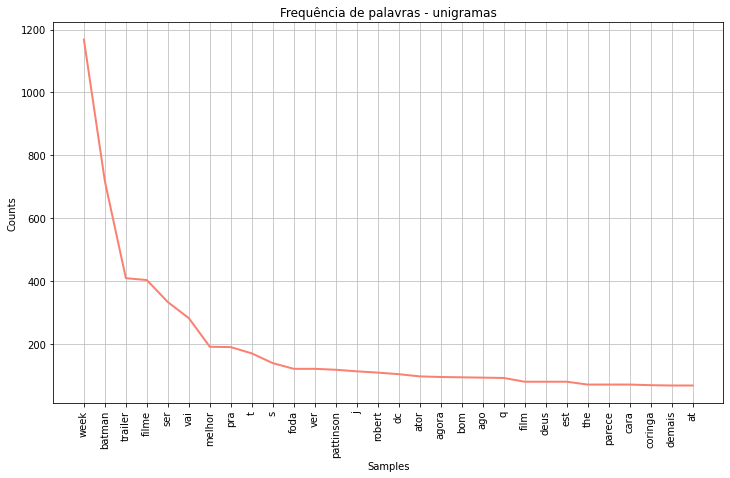

In [54]:
# visualizando as 30 palavras mais frequentes - unigramas
plt.figure(figsize=[12, 7])
nlp_words = nltk.FreqDist(all_words)
plot1 = nlp_words.plot(30, color = 'salmon', 
                       title = 'Frequ√™ncia de palavras - unigramas')

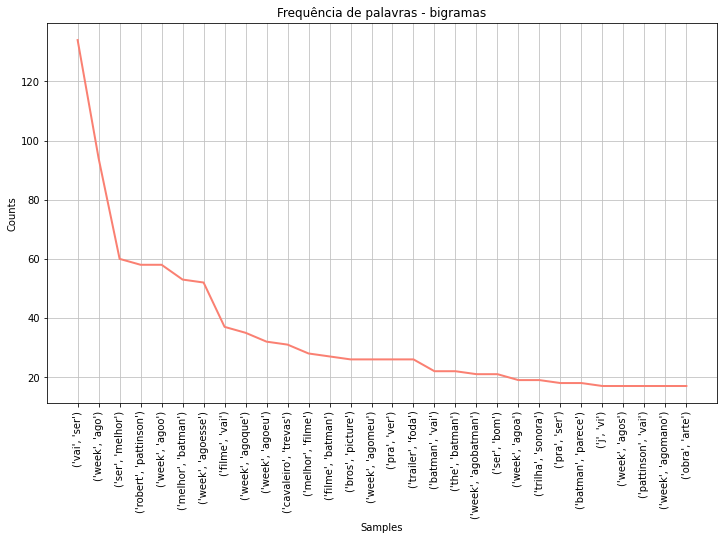

In [55]:
# visualizando as 30 palavras mais frequentes - bigramas
plt.figure(figsize=[12, 7])
bigrm = list(nltk.bigrams(all_words))
words2 = nltk.FreqDist(bigrm)
words2.plot(30, color = 'salmon', 
           title = 'Frequ√™ncia de palavras - bigramas')

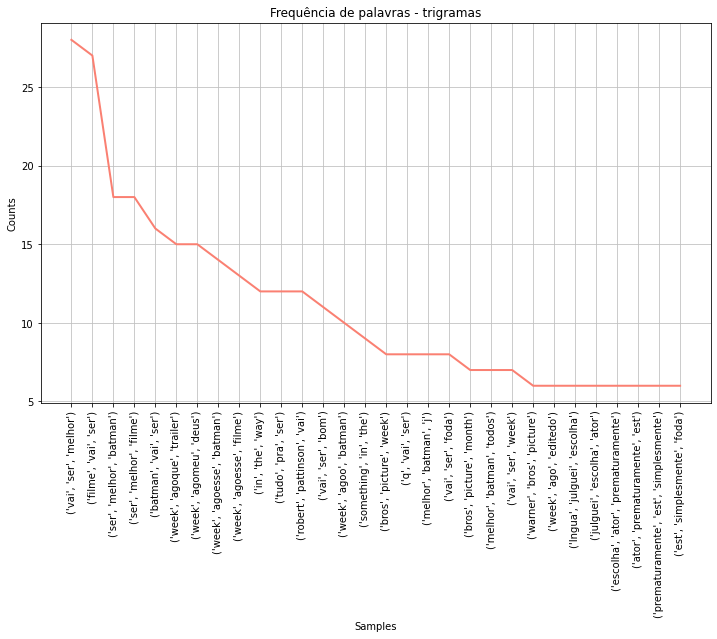

In [56]:
# visualizando as 30 palavras mais frequentes - trigramas
plt.figure(figsize=[12, 7])
trigrm = list(nltk.trigrams(all_words))
words3 = nltk.FreqDist(trigrm)
words3.plot(30, color = 'salmon', 
           title = 'Frequ√™ncia de palavras - trigramas')

In [57]:
# importando as bibliotecas necess√°rias
# import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [58]:
# exemplos de coment√°rios da lista "all_words"
display(all_words[89:100])
display(all_words[681])
display(all_words[904])
display(all_words[1002])

['homens',
 'destino',
 'interrogation',
 'promotor',
 'gotham',
 'gil',
 'colson',
 'jayme',
 'lawson',
 'farewell',
 'amor']

'quero'

'esperava'

'capitais'

In [59]:
# realizando a concatena√ß√£o das palavras
all_summary = ' '.join(s for s in all_words)

In [61]:
# atualizando a lista de stopwords
stopwords = set(STOPWORDS)
stopwords.update(['in', 'the', 'way', 'week', 'weeks', 'q', 'j', 't', 'est', 'batman', 'ago', 'deu'])

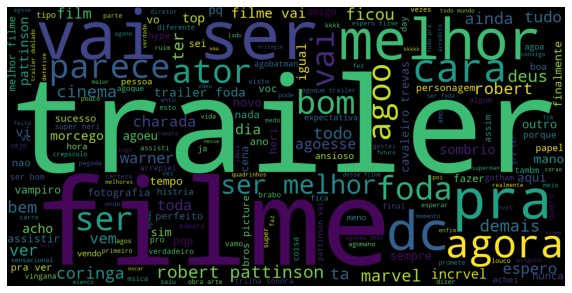

In [62]:
# gerando uma wordcloud - nuvem de palavras
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=1600, height=800).generate(all_summary)
 
# mostrando a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud);

# salvando a imagem
wordcloud.to_file('thebatman2021_summary_wordcloud.png');

Vamos criar uma nuvem de palavras com o novo `logo` do **Batman**.

In [63]:
# carregando a imagem para o google colab
from google.colab import files
uploaded = files.upload()

Saving new-logo-thebatman2021.png to new-logo-thebatman2021.png


In [64]:
# importando a biblioteca
import numpy as np

In [65]:
# criando uma m√°scara com a imagem
batman_mask = np.array(Image.open('/content/new-logo-thebatman2021.png'))

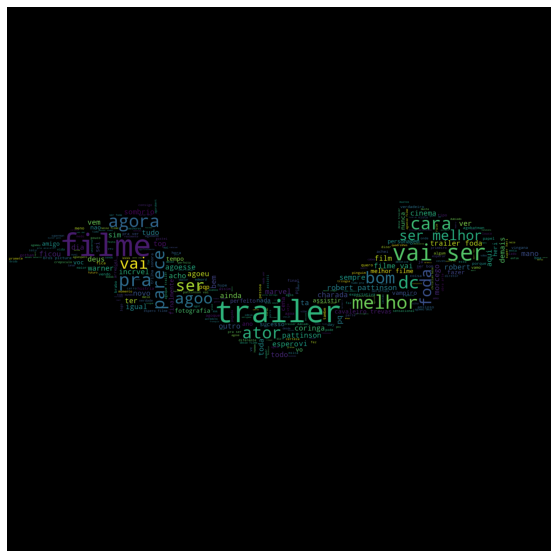

In [66]:
# gerando uma wordcloud - nuvem de palavras com o logo do filme
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=1200, height=620, max_words=300,
                      mask=batman_mask, max_font_size=200,
                      min_font_size=1).generate(all_summary)
 
# mostrando a imagem final
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud)

# salvando a imagem
wordcloud.to_file('thebatman2021_summary_wordcloud2.png');

In [71]:
# atualizando a lista de stopwords
stopwords = set(STOPWORDS)
stopwords.update(['in', 'the', 'way', 'week', 'weeks', 'q', 'j', 't', 'est', 'batman', 'ago', 'deu', 'trailer', 'agoo'])

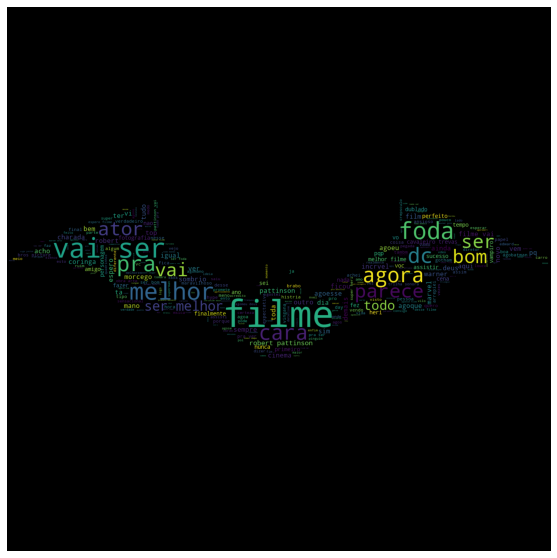

In [72]:
# gerando uma wordcloud - nuvem de palavras com o logo do filme
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=1200, height=620, max_words=300,
                      mask=batman_mask, max_font_size=200,
                      min_font_size=1).generate(all_summary)
 
# mostrando a imagem final
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud)

# salvando a imagem
wordcloud.to_file('thebatman2021_summary_wordcloud3.png');